# Wrangle

In [1]:
# import data science libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Acquire

In [2]:
# read saas.csv
df = pd.read_csv("saas.csv")
df

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0
...,...,...,...,...,...
790453,2017-12-31,1029395,5790453,0.0,0.0
790454,2017-12-31,1029396,5790454,0.0,0.0
790455,2017-12-31,1029397,5790455,3.0,15.0
790456,2017-12-31,1029398,5790456,0.0,0.0


In [3]:
# rename columns
df.rename(
    columns={
        "Month_Invoiced": "invoice_month",
        "Customer_Id": "customer_id",
        "Invoice_Id": "invoice_id",
        "Subscription_Type": "subscription_type",
        "Amount": "amount",
    },
    inplace=True,
)

In [4]:
# peak at df with new column names
df

,invoice_month,customer_id,invoice_id,subscription_type,amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0
...,...,...,...,...,...
790453,2017-12-31,1029395,5790453,0.0,0.0
790454,2017-12-31,1029396,5790454,0.0,0.0
790455,2017-12-31,1029397,5790455,3.0,15.0
790456,2017-12-31,1029398,5790456,0.0,0.0


In [5]:
# how many unique values are contained in the subscription_type and amount columns?
for col in df.drop(columns=["invoice_month", "customer_id", "invoice_id"]).columns.tolist():
    print()
    print(df[col].value_counts())


0.0    496410
1.0    178212
2.0     70706
3.0     26474
4.0     18656
Name: subscription_type, dtype: int64

0.0     496410
5.0     178212
10.0     70706
15.0     26474
20.0     18656
Name: amount, dtype: int64


In [6]:
# let's get some high-level information on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   invoice_month      790458 non-null  object 
 1   customer_id        790458 non-null  int64  
 2   invoice_id         790458 non-null  int64  
 3   subscription_type  790458 non-null  float64
 4   amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [7]:
# call .describe() on the product related variables
df.drop(columns=["customer_id", "invoice_id"]).describe()

,subscription_type,amount
count,790458.000000,790458.000000
mean,0.599235,2.996174
std,0.950380,4.751901
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,5.000000
max,4.000000,20.000000


In [8]:
# how many null values exist in our data?
df.isna().sum()

invoice_month        0
customer_id          0
invoice_id           0
subscription_type    0
amount               0
dtype: int64

In [9]:
print(f"The saas DataFrame is made up of {df.shape[0]:,} rows {df.shape[1]} columns.")

The saas DataFrame is made up of 790,458 rows 5 columns.


In [10]:
# unique customers
print(f"There are records for {len(df.customer_id.unique()):,} unique customers in the saas DataFrame.")

There are records for 29,400 unique customers in the saas DataFrame.


In [11]:
# unique invoices
print(f"""There are {len(df.invoice_id.unique()):,} unique invoices in the saas DataFrame.
I think it is safe to assume that each row represents a transaction.""")

There are 790,458 unique invoices in the saas DataFrame.
I think it is safe to assume that each row represents a transaction.


In [12]:
# unique subscription_types
print(f"There are {len(df.subscription_type.unique())} different subscription types in the saas data.")

There are 5 different subscription types in the saas data.


In [13]:
# unique subscription_types
print(f"There are {len(df.amount.unique())} different amounts in the saas data.")

There are 5 different amounts in the saas data.


In [14]:
# unique invoice_month
print(f"There are {len(df.invoice_month.unique())} months worth of data in the saas DataFrame.")

There are 48 months worth of data in the saas DataFrame.


## Prepare

In [15]:
# transform invoice_month from object dtype to datetime dtype
df["invoice_month"] = pd.to_datetime(df["invoice_month"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice_month      790458 non-null  datetime64[ns]
 1   customer_id        790458 non-null  int64         
 2   invoice_id         790458 non-null  int64         
 3   subscription_type  790458 non-null  float64       
 4   amount             790458 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 30.2 MB


In [17]:
# use invoice_month as index
df = df.sort_values("invoice_month").set_index("invoice_month")

In [18]:
# peak at df to ensure transformation took
df

,customer_id,invoice_id,subscription_type,amount
invoice_month,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1013336,5013336,0.0,0.0
2014-01-31,1013335,5013335,0.0,0.0
2014-01-31,1013334,5013334,0.0,0.0
2014-01-31,1013333,5013333,1.0,5.0
...,...,...,...,...
2017-12-31,1012069,5781185,0.0,0.0
2017-12-31,1012072,5781186,0.0,0.0
2017-12-31,1012074,5781187,1.0,5.0


In [19]:
# split data into train and test
train = df.loc[:"2016-12-31"]
test = df.loc["2017-01-31":]

# peak at train
train

,customer_id,invoice_id,subscription_type,amount
invoice_month,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1013336,5013336,0.0,0.0
2014-01-31,1013335,5013335,0.0,0.0
2014-01-31,1013334,5013334,0.0,0.0
2014-01-31,1013333,5013333,1.0,5.0
...,...,...,...,...
2016-12-31,1010259,5608214,3.0,15.0
2016-12-31,1010228,5608206,0.0,0.0
2016-12-31,1010199,5608193,1.0,5.0


In [20]:
# peak at test
test

,customer_id,invoice_id,subscription_type,amount
invoice_month,,,,
2017-01-31,1020518,5628062,1.0,5.0
2017-01-31,1020515,5628061,1.0,5.0
2017-01-31,1020508,5628057,0.0,0.0
2017-01-31,1020513,5628059,0.0,0.0
2017-01-31,1020511,5628058,2.0,10.0
...,...,...,...,...
2017-12-31,1012069,5781185,0.0,0.0
2017-12-31,1012072,5781186,0.0,0.0
2017-12-31,1012074,5781187,1.0,5.0


In [21]:
# the number of rows in our resultant split DataFrames should be the same as our initial DataFrame
train.shape[0] + test.shape[0]

790458

In [22]:
# how much data is out-of-sample?
print(f"The test DataFrame is made up of {test.shape[0] / df.shape[0]:.2%} of the originating DataFrame.")

The test DataFrame is made up of 21.80% of the originating DataFrame.


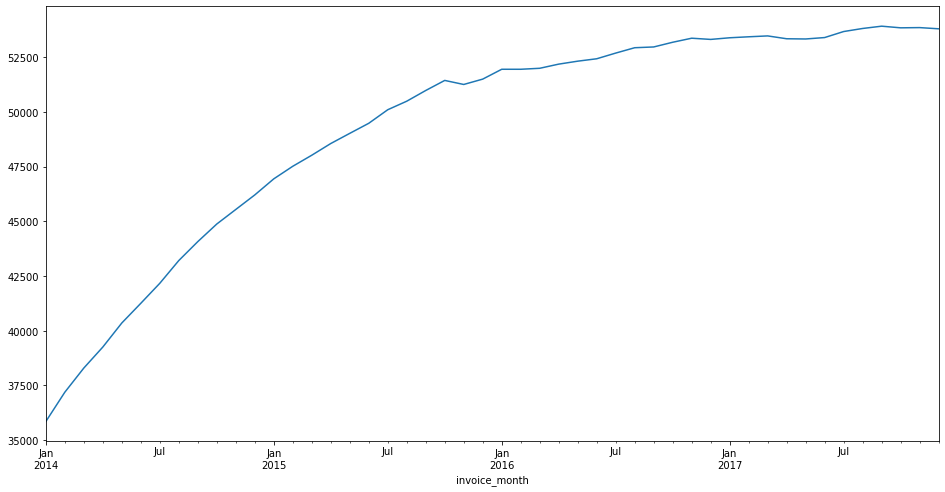

In [23]:
# let's plot the amount (presumably sales) for the df variable
df.groupby("invoice_month").amount.sum().plot(figsize=(16, 8))
plt.show()

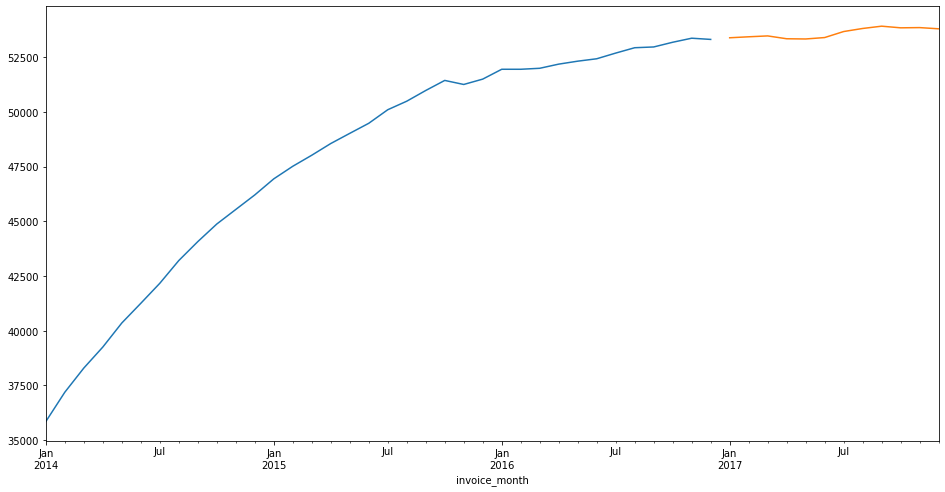

In [24]:
# plot the train and test DataFrames
train.groupby("invoice_month").amount.sum().plot(figsize=(16, 8))
test.groupby("invoice_month").amount.sum().plot(figsize=(16, 8))
plt.show()

In [25]:
# ensure the data we are seeing in our plots corresponds to a manual calulation of the plot
train.groupby("invoice_month").amount.sum()

invoice_month
2014-01-31    35850.0
2014-02-28    37190.0
2014-03-31    38295.0
2014-04-30    39255.0
2014-05-31    40355.0
2014-06-30    41255.0
2014-07-31    42170.0
2014-08-31    43210.0
2014-09-30    44075.0
2014-10-31    44880.0
2014-11-30    45545.0
2014-12-31    46210.0
2015-01-31    46945.0
2015-02-28    47520.0
2015-03-31    48025.0
2015-04-30    48560.0
2015-05-31    49025.0
2015-06-30    49485.0
2015-07-31    50105.0
2015-08-31    50495.0
2015-09-30    50985.0
2015-10-31    51445.0
2015-11-30    51260.0
2015-12-31    51505.0
2016-01-31    51955.0
2016-02-29    51955.0
2016-03-31    52000.0
2016-04-30    52190.0
2016-05-31    52325.0
2016-06-30    52435.0
2016-07-31    52695.0
2016-08-31    52940.0
2016-09-30    52975.0
2016-10-31    53190.0
2016-11-30    53375.0
2016-12-31    53320.0
Name: amount, dtype: float64

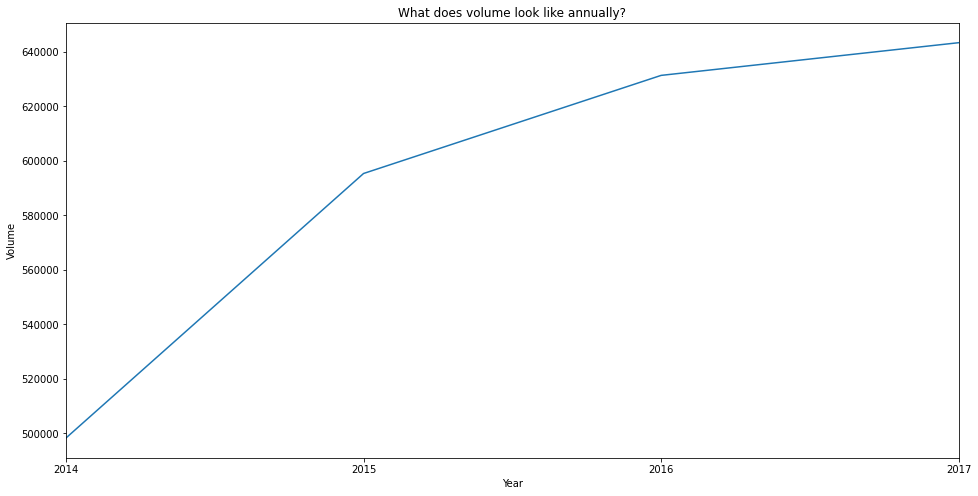

In [26]:
# plot annual volume
df.resample("Y").amount.sum().plot(figsize=(16,8))

plt.title("What does volume look like annually?")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

In [27]:
df.subscription_type.sort_values().unique().tolist()

[0.0, 1.0, 2.0, 3.0, 4.0]

In [28]:
for sub in df.subscription_type.sort_values().unique().tolist():
    print(int(sub))

0
1
2
3
4


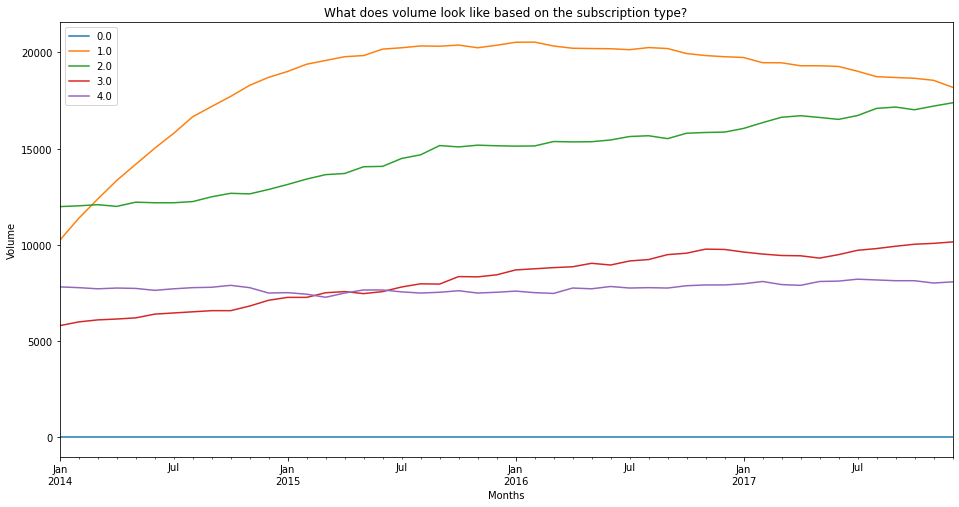

In [29]:
# what does volume look like based on the subscription type?
for sub in df.subscription_type.sort_values().unique().tolist():
    ax = df[df.subscription_type == sub].groupby("invoice_month").amount.sum().plot(figsize=(16,8))

plt.title("What does volume look like based on the subscription type?")
plt.xlabel("Months")
plt.ylabel("Volume")
plt.legend(df.subscription_type.sort_values().unique().tolist())
plt.show()

**Takeaways**: Looks like subscription type `0.0` may be prospects? Regardless, there is no revenue coming in from type `0.0`. Type `1.0` seems to have seen a decline in popularity as of late despite a rather meteoric rise in popularity from 2014 through mid-2015. Subscription types `2.0` and `3.0` have seen steady growth for the time period observed in the data set; howvever, type `3.0`'s revenue is lower than `2.0`. I'd like to know the COGS for each subscription type in order to determine which product line is most profitable. Type `4.0` has seen the same amount of revenue throughout the observed time period.

Manually examining the data plotted above:

In [30]:
# df[df.subscription_type == 0.0].groupby("invoice_month").amount.sum()

In [31]:
# df[df.subscription_type == 1.0].groupby("invoice_month").amount.sum()

In [32]:
# manually calculating monthly growth rates
# (11380.0 - 10235.0) / 10235.0

In [33]:
# df[df.subscription_type == 2.0].groupby("invoice_month").amount.sum()

In [34]:
# df[df.subscription_type == 3.0].groupby("invoice_month").amount.sum()

In [35]:
# df[df.subscription_type == 4.0].groupby("invoice_month").amount.sum()

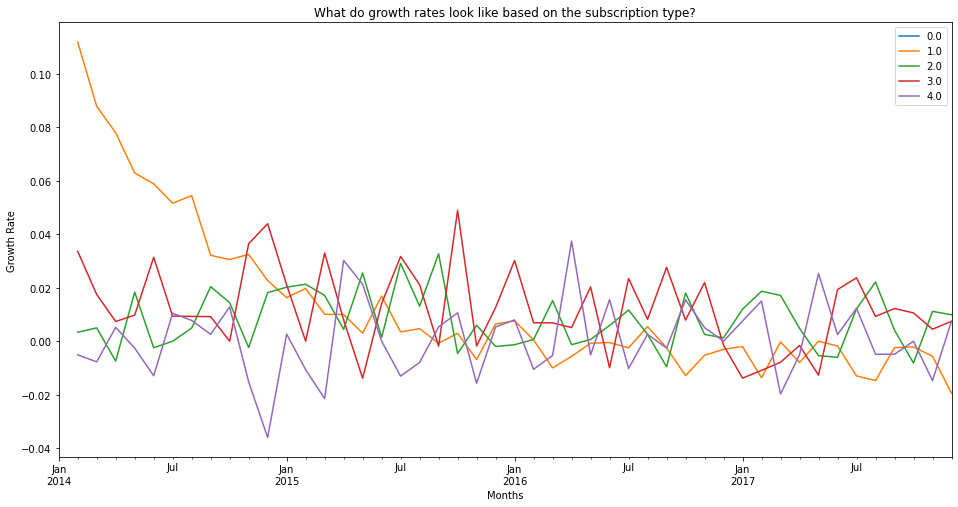

In [36]:
# what do growth rates look like based on the subscription type?
for sub in df.subscription_type.sort_values().unique().tolist():
    ax = df[df.subscription_type == sub].groupby("invoice_month").amount.sum().pct_change().plot(figsize=(16,8))

plt.title("What do growth rates look like based on the subscription type?")
plt.xlabel("Months")
plt.ylabel("Growth Rate")
plt.legend(df.subscription_type.sort_values().unique().tolist())
plt.show()

In [37]:
# manually investigating the data shown above
# df[df.subscription_type == 1.0].groupby("invoice_month").amount.sum().pct_change()

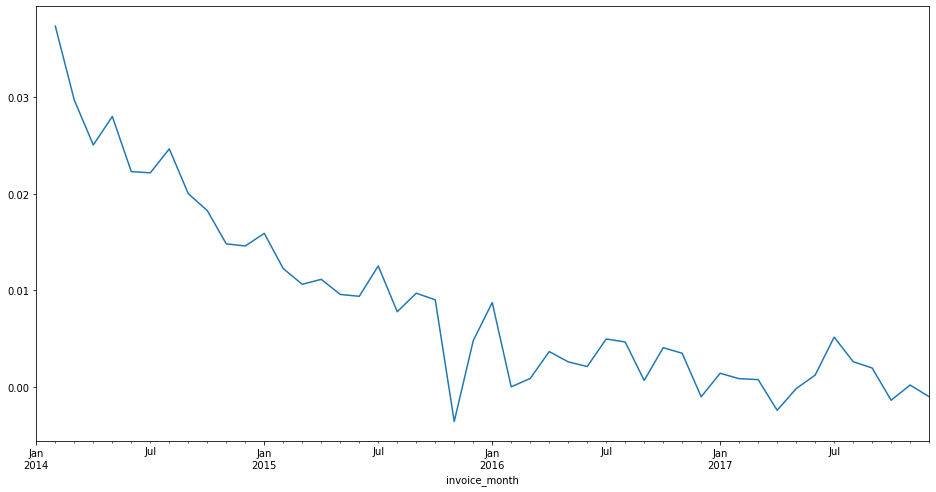

In [38]:
# what does the overall growth rate for all subscriptions look like?
df.groupby("invoice_month").amount.sum().pct_change().plot(figsize=(16, 8))
plt.show()

**Takeaway**: This is not good. There has been a steady decline in growth for the data throughout the time period. If this is not already known, this needs to be communicated ASAP.